In [2]:
import os
import pandas as pd

df = pd.read_csv(os.path.join('data','shuttle_custom.csv'))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58004 entries, 0 to 58003
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      58004 non-null  int64  
 1   A2      58002 non-null  float64
 2   A3      57999 non-null  float64
 3   A4      58001 non-null  float64
 4   A5      58001 non-null  float64
 5   A6      57999 non-null  float64
 6   A7      58003 non-null  float64
 7   A8      58001 non-null  float64
 8   A9      58004 non-null  int64  
 9   target  58004 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 4.4 MB


In [3]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,target
0,50,21.0,77.0,0.0,28.0,0.0,27.0,48.0,22,2
1,55,0.0,92.0,0.0,0.0,26.0,36.0,92.0,56,4
2,53,0.0,82.0,0.0,52.0,-5.0,29.0,30.0,2,1
3,37,0.0,76.0,0.0,28.0,18.0,40.0,48.0,8,1
4,37,0.0,79.0,0.0,34.0,-26.0,43.0,46.0,2,1


In [4]:
df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,target
57999,80,0.0,84.0,0.0,-36.0,-29.0,4.0,120.0,116,5
58000,55,0.0,81.0,0.0,-20.0,25.0,26.0,102.0,76,4
58001,55,0.0,77.0,0.0,12.0,-22.0,22.0,65.0,42,4
58002,37,0.0,103.0,0.0,18.0,-16.0,66.0,85.0,20,1
58003,56,2.0,98.0,0.0,52.0,1.0,42.0,46.0,4,4


## Data Exploration

In [5]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,target
count,58004.000000,58002.000000,57999.000000,58001.000000,58001.000000,57999.000000,58003.000000,58001.000000,58004.000000,58004.000000
mean,48.238777,-0.019499,85.348472,0.259668,34.549232,1.608286,37.091702,50.885054,13.933177,1.694849
std,12.238636,77.956689,8.902499,36.521201,21.660569,217.599549,13.111841,21.417895,25.615089,1.351024
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-26739.000000,-48.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,79.000000,0.000000,26.000000,-5.000000,32.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000,1.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,15164.000000,105.000000,270.000000,266.000000,7.000000


In [7]:
df.target.value_counts()

target
1    45588
4     8904
5     3268
3      171
2       50
7       13
6       10
Name: count, dtype: int64

In [9]:
# Visual overview
predictors = ['A1','A2','A3','A4','A5','A6','A7','A8','A9']
target = 'target'

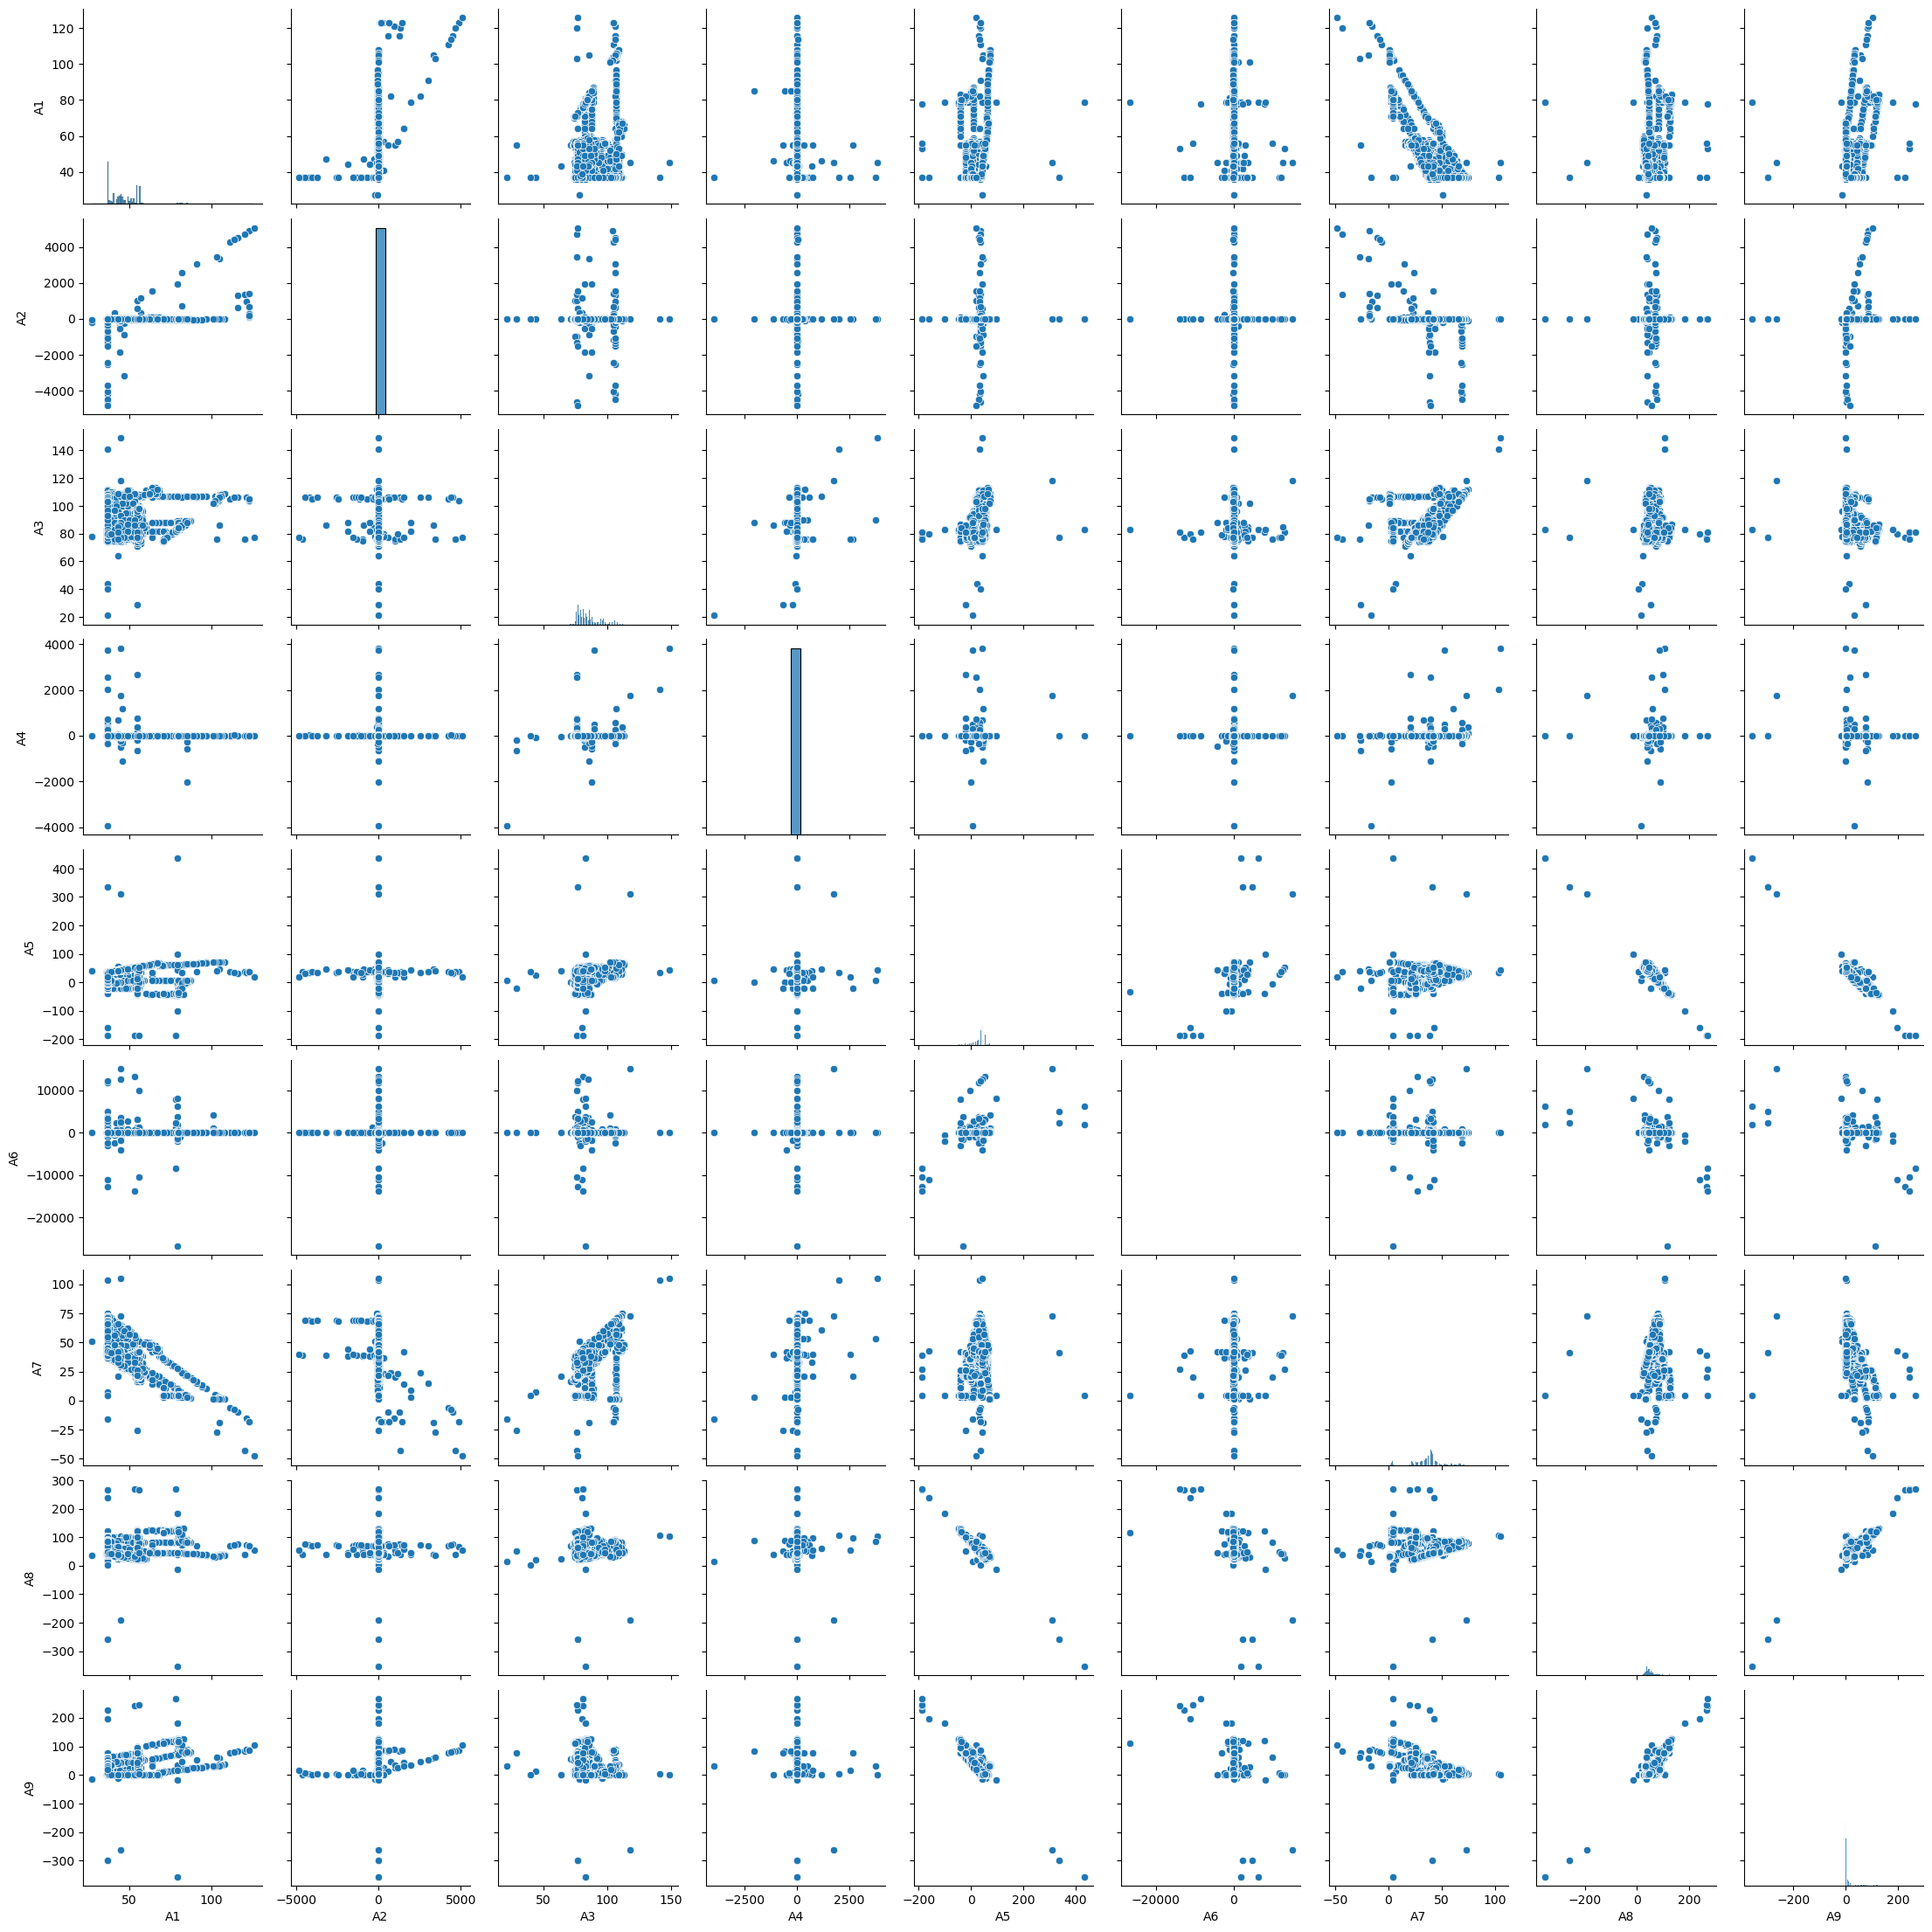

In [10]:
# import library
import seaborn as sns
import matplotlib.pyplot as plt

#  pairplot
sns.pairplot(df[predictors])
plt.show()

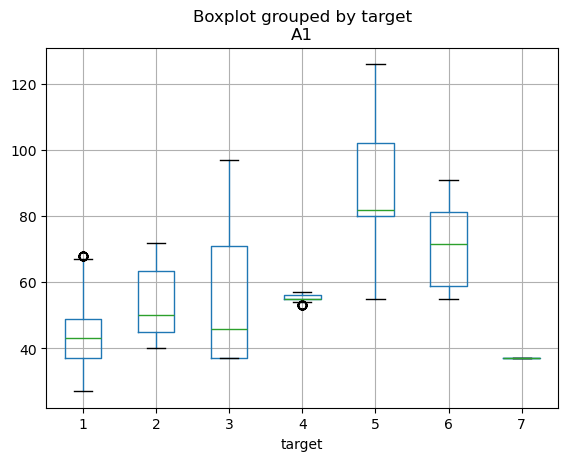

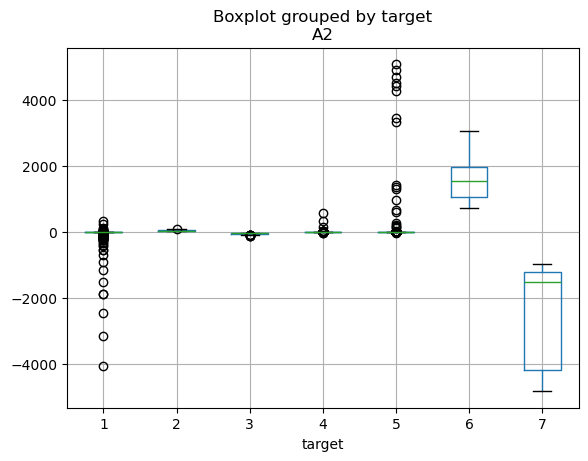

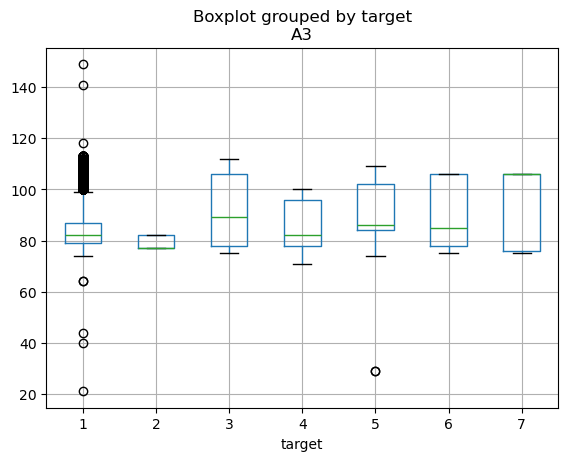

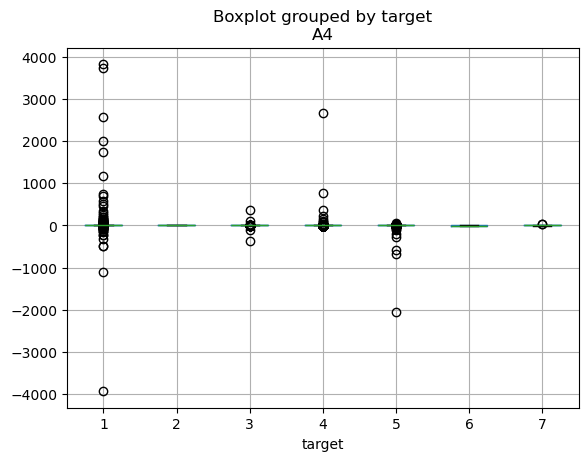

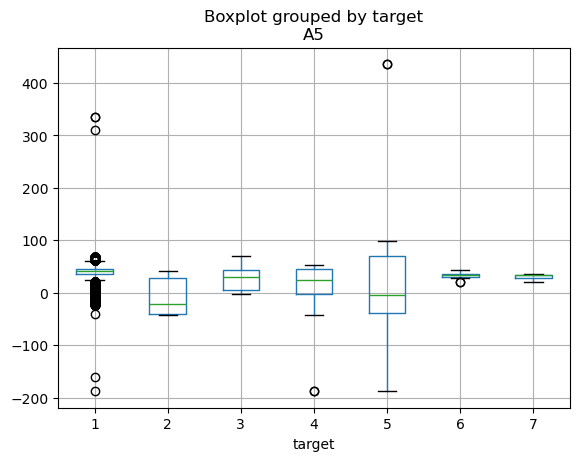

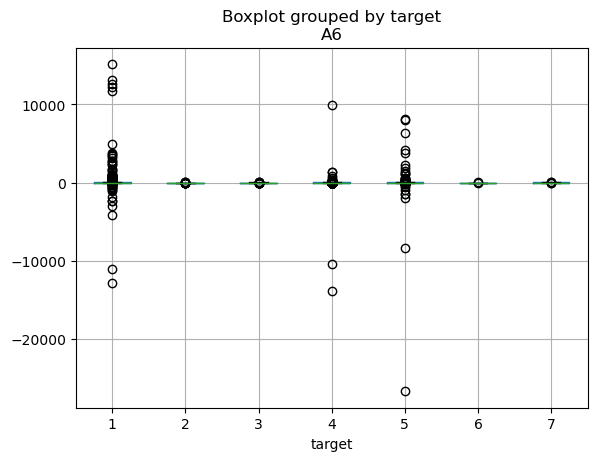

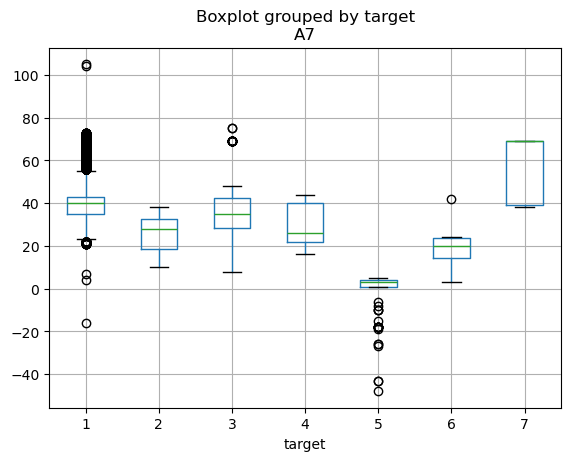

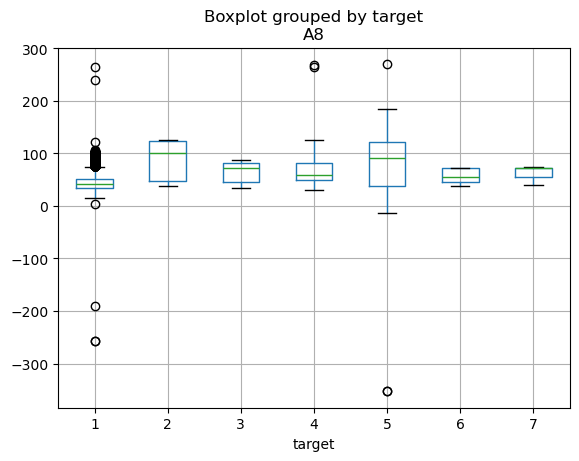

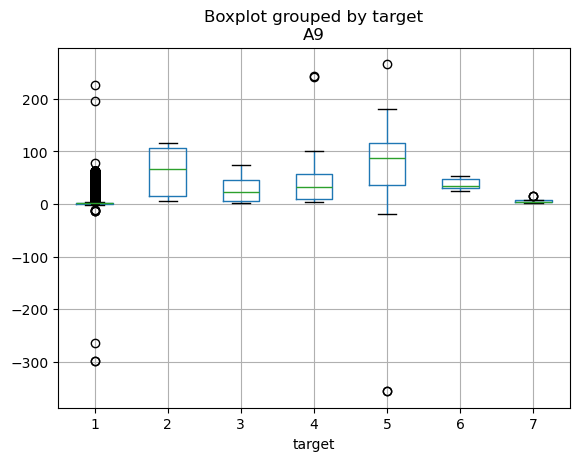

In [11]:
#  boxplots
for feature in predictors:
    df.boxplot(feature, by=target)
    plt.show()

## Data Preprocessing

In [12]:
# Normalise the data to bring to the scale due to Neural Networks

# Importing a library
from sklearn.preprocessing import MinMaxScaler

# Create an instance
scaler = MinMaxScaler()

# Scale the dataset. P.S. only the predictors and not the target variable, since it is already binary
scaled = scaler.fit_transform(df[predictors])

# Preview the data
print(scaled)

[[0.23232323 0.4892886  0.4375     ... 0.49019608 0.64365971 0.60771704]
 [0.28282828 0.48716653 0.5546875  ... 0.54901961 0.71428571 0.66237942]
 [0.26262626 0.48716653 0.4765625  ... 0.50326797 0.61476726 0.5755627 ]
 ...
 [0.28282828 0.48716653 0.4375     ... 0.45751634 0.67094703 0.63987138]
 [0.1010101  0.48716653 0.640625   ... 0.74509804 0.70304976 0.60450161]
 [0.29292929 0.48736863 0.6015625  ... 0.58823529 0.64044944 0.57877814]]


## Model creation

In [13]:
# Split data
from sklearn.model_selection import train_test_split

X = scaled
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Check sizes
print('Training: ', X_train.shape)
print('Testing: ', X_test.shape)

Training:  (40602, 9)
Testing:  (17402, 9)
